<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Association_Rule_using_apyori_(Apriori)_%2C(Support%2C_confidence%2C_and_lift)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

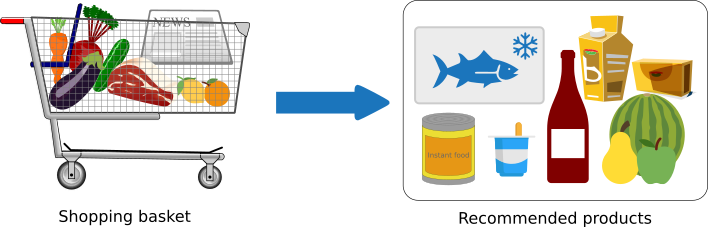

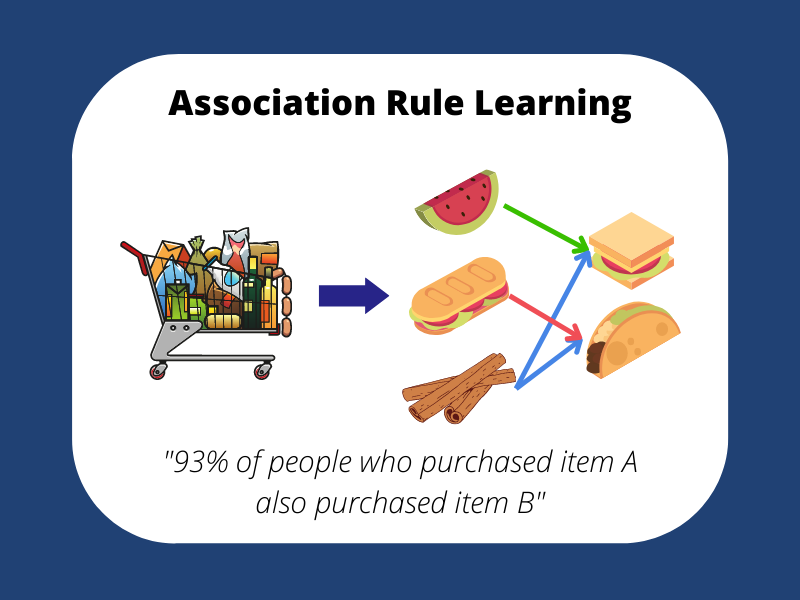

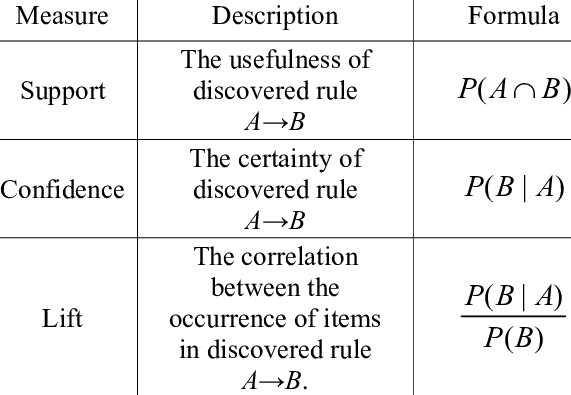

In machine learning, support, confidence, and lift are metrics used to create association rules that identify relationships between items in data:

**Support**

The percentage of transactions in a dataset that contain a specific item or set of items. Support measures the importance of an item or set of items.

**Confidence**

The percentage of transactions that contain a specific item or set of items, given that another item or set of items is also present. Confidence measures the strength or reliability of a rule.

**Lift**

A metric that compares the observed confidence with the expected confidence. Lift measures how much more likely the consequent is to occur when the antecedent is present.

Here's how to use these metrics to create association rules:
Identify items that commonly appear: Set minimum support thresholds to indicate how many times items must appear.

Calculate confidence thresholds: Calculate confidence thresholds that indicate how often an association between two items occurs.
Use lift to compare confidence: Use lift to compare the observed confidence with the expected confidence.

**A high lift or conviction value (>1)** indicates that the events are positively related. For example, if buying item B is very rare, but it appears in a single transaction with item A, the lift from one to the other is large.

Association rule learning is a rule-based method for discovering interesting relations between variables in large databases. The Apriori algorithm is a common association rule learning method used in supermarket shopping basket analysis.

In [ ]:
# !pip install apriori
# !pip install apyori

In [5]:
#Association Learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

#load dataset
from google.colab import files
uploaded = files.upload()

Saving Market_Basket_Optimisation.csv to Market_Basket_Optimisation.csv


In [12]:
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:

# Create a list of transactions
transactions = []
for i in range(0, 7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

# Train the Apriori model on the dataset
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

# Visualising the results
results = list(rules)
results



[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

A ***high lift value*** indicates that the association rule is more significant, as it suggests that the two items are highly dependent on each other. On the other hand, a low lift value indicates that the association rule is not very significant, as it suggests that the two items are not strongly dependent on each other.

It is calculated as the number of transactions containing both items divided by the number of transactions containing the first item. **High confidence** indicates that the presence of the first item is a strong predictor of the presence of the second item

In [18]:
#visalise using chart
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

# Displaying the results non sorted
resultsinDataFrame

# Displaying the results sorted by descending lifts
resultsinDataFrame.nlargest(n = 50, columns = 'Lift')


,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


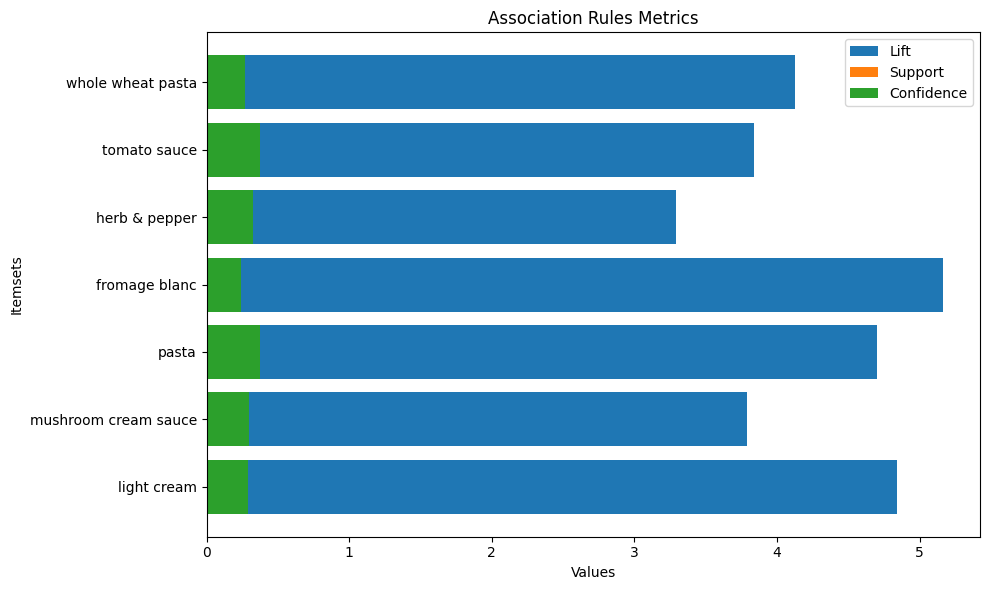

In [21]:

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(resultsinDataFrame['Left Hand Side'], resultsinDataFrame['Lift'], label='Lift')
plt.barh(resultsinDataFrame['Left Hand Side'], resultsinDataFrame['Support'], label='Support')
plt.barh(resultsinDataFrame['Left Hand Side'], resultsinDataFrame['Confidence'], label='Confidence')

plt.xlabel('Values')
plt.ylabel('Itemsets')
plt.title('Association Rules Metrics')
plt.legend()
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

---------Ending------